Based off of Calc12_4_23FePolymerTest.m 

Converted from MATLAB to Python, retaining all variables, names, and outputs

In [37]:
import pandas as pd
import jax.numpy as jnp
import numpy as onp
import matplotlib.pyplot as plt

In [ ]:
# Define material properties
material_name = 'VF_12_4_23%FePolymerTest'

# Given values for permeability (χ_m) equation 1
B_x1 = (8.41)
C_x1 = (0.52)
D_x1 = (0.19)

# Given values for permittivity (ε(f)) equation 1
B_ep1 = (5.41) + (1.1j)
C_ep1 = (4) - (0.79j)
D_ep1 = (-2E-003) - (2.6E-002j)
E_ep1 = (-0.61) + (0.7j)
F_ep1 = (0.18) + (0.57j)
G_ep1 = (0.12) + (7E-002j)

# Given values for permittivity (ε(f)) equation 2
B_ep2 = (4.48) + (0.16j)
C_ep2 = (1.69) - (0.46j)
D_ep2 = (-0.2) - (7E-002j)
E_ep2 = (-0.62) + (0.11j)
F_ep2 = (3.65) + (8E-002j)
G_ep2 = (29.6) - (23.5j)
H_ep2 = (-115) + (53.4j)

# Volume fraction
f = (0.23)

In [17]:
# Define frequency range (GHz)
f_min = 0.2;  # Hz
f_max = 10; # Hz
num_points = 99; # Number of frequency points
frequencies = onp.linspace(f_min, f_max, num_points)

In [36]:
# Compute X1(f)
x_1 = B_x1*((1-1j*(frequencies/D_x1))/((1-(frequencies/C_x1)**2)-(1j*(frequencies/D_x1))))

# Compute ε1(f)
e_1 = B_ep1+(C_ep1*(frequencies**D_ep1)) + (E_ep1*((1-(frequencies/F_ep1)**2)-(1j*(frequencies/D_x1)))**-1)

# Compute ε2(f)
e_2 = (B_ep2 + (C_ep2.real*(frequencies**D_ep2)) + (C_ep2.imag*(frequencies**E_ep2))) + (F_ep2*(1-(frequencies/G_ep2)**2-2j*(frequencies/H_ep2))**-1)

# Convert chi to mu
mu_1 = x_1 + 1

# Use MGT relations to find effective permittivity
e_e = (e_2)*((1+((2*f)*((e_1-e_2)/(e_1+(2*e_2)))))/(1-f*((e_1-e_2)/(e_1+(2*e_2)))))


In [64]:
#Export to data table / .csv file

data_table = {
        'Frequency_GHz': frequencies,
        'Real_Epsilon': e_e.real,
        'Imag_Epsilon': e_e.imag,
        'Real_Mu': mu_1.real,
        'Imag_Mu': mu_1.imag
    }
df = pd.DataFrame(data_table)

df = pd.DataFrame(data_table)
df.to_csv(f'{material_name}.csv', index=False)

print(f'Data exported to {material_name}.csv')


Data exported to VF_12_4_23%FePolymerTest.csv


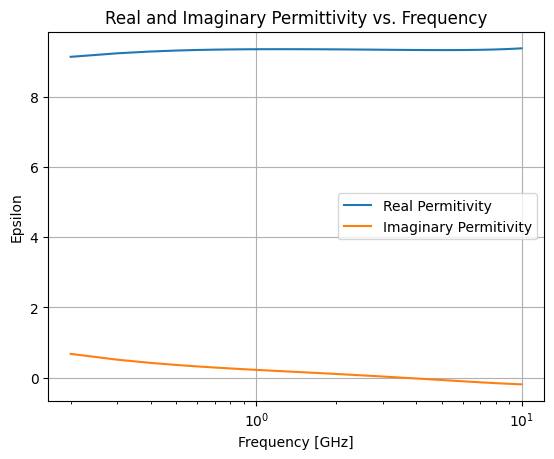

In [ ]:
#Create plot 1 - Real and Imaginary Permittivity vs. Frequency (Epsilon)

plt.semilogx(frequencies, e_e.real, label='Real Permitivity')
plt.semilogx(frequencies, e_e.imag, label='Imaginary Permitivity')
plt.title('Real and Imaginary Permittivity vs. Frequency')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Epsilon')
plt.legend()
plt.grid(True)
plt.show()

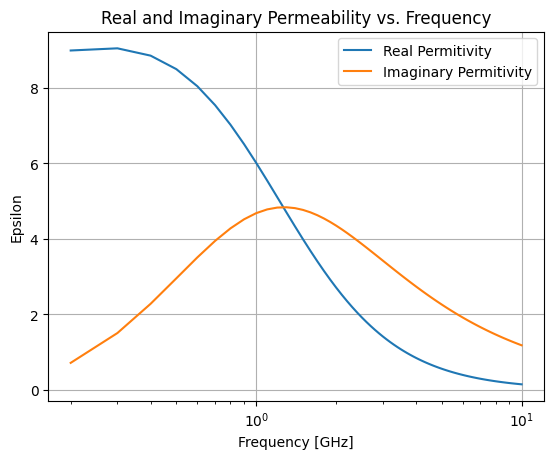

In [69]:
#Create plot 2 - Real and Imaginary Permittivity vs. Frequency (Mu)

plt.semilogx(frequencies, x_1.real, label='Real Permitivity')
plt.semilogx(frequencies, x_1.imag, label='Imaginary Permitivity')
plt.title('Real and Imaginary Permeability vs. Frequency')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Epsilon')
plt.legend()
plt.grid(True)
plt.show()